In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#Visualization
import seaborn as sns
from sklearn.preprocessing import StandardScaler
#EDA
from collections import Counter
from pydantic_settings import BaseSettings
import ydata_profiling as pp
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#ensembling
from mlxtend.classifier import StackingCVClassifier

In [20]:
#import dataset
heart_df = pd.read_csv(r'C:\Users\ethan\Downloads\heart_disease_health_indicators_BRFSS2015.csv')

In [3]:
#Missing Values
heart_df.isnull().sum().sum()

0

In [4]:
heart_df.shape

(253680, 22)

In [5]:
pp.ProfileReport(heart_df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
# Print the data types of each column
print(heart_df.dtypes)

# Separate float and integer columns
float_columns = heart_df.select_dtypes(include=['float64']).columns
int_columns = heart_df.select_dtypes(include=['int64']).columns

print("Float columns:", float_columns)
print("Integer columns:", int_columns)

HeartDiseaseorAttack    float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
Diabetes                float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object
Float columns: Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex

In [7]:
heart_df.describe().transpose()

count       mean       std   min   25%   50%   75%  \
HeartDiseaseorAttack  253680.0   0.094186  0.292087   0.0   0.0   0.0   0.0   
HighBP                253680.0   0.429001  0.494934   0.0   0.0   0.0   1.0   
HighChol              253680.0   0.424121  0.494210   0.0   0.0   0.0   1.0   
CholCheck             253680.0   0.962670  0.189571   0.0   1.0   1.0   1.0   
BMI                   253680.0  28.382364  6.608694  12.0  24.0  27.0  31.0   
Smoker                253680.0   0.443169  0.496761   0.0   0.0   0.0   1.0   
Stroke                253680.0   0.040571  0.197294   0.0   0.0   0.0   0.0   
Diabetes              253680.0   0.296921  0.698160   0.0   0.0   0.0   0.0   
PhysActivity          253680.0   0.756544  0.429169   0.0   1.0   1.0   1.0   
Fruits                253680.0   0.634256  0.481639   0.0   0.0   1.0   1.0   
Veggies               253680.0   0.811420  0.391175   0.0   1.0   1.0   1.0   
HvyAlcoholConsump     253680.0   0.056197  0.230302   0.0   0.0   0.0   0.0   
AnyHealthcare         253680.0   0.951053  0.215759   0.0   1.0   1.0   1.0   
NoDocbcCost           253680.0   0.084177  0.277654   0.0   0.0   0.0   0.0   
GenHlth               253680.0   2.511392  1.068477   1.0   2.0   2.0   3.0   
MentHlth              253680.0   3.184772  7.412847   0.0   0.0   0.0   2.0   
PhysHlth              253680.0   4.242081  8.717951   0.0   0.0   0.0   3.0   
DiffWalk              253680.0   0.168224  0.374066   0.0   0.0   0.0   0.0   
Sex                   253680.0   0.440342  0.496429   0.0   0.0   0.0   1.0   
Age                   253680.0   8.032119  3.054220   1.0   6.0   8.0  10.0   
Education             253680.0   5.050434  0.985774   1.0   4.0   5.0   6.0   
Income                253680.0   6.053875  2.071148   1.0   5.0   7.0   8.0   

                       max  
HeartDiseaseorAttack   1.0  
HighBP                 1.0  
HighChol               1.0  
CholCheck              1.0  
BMI                   98.0  
Smoker                 1.0  
Stroke                 1.0  
Diabetes               2.0  
PhysActivity           1.0  
Fruits                 1.0  
Veggies                1.0  
HvyAlcoholConsump      1.0  
AnyHealthcare          1.0  
NoDocbcCost            1.0  
GenHlth                5.0  
MentHlth              30.0  
PhysHlth              30.0  
DiffWalk               1.0  
Sex                    1.0  
Age                   13.0  
Education              6.0  
Income                 8.0

In [8]:
heart_df.isnull()

HeartDiseaseorAttack  HighBP  HighChol  CholCheck    BMI  Smoker  \
0                      False   False     False      False  False   False   
1                      False   False     False      False  False   False   
2                      False   False     False      False  False   False   
3                      False   False     False      False  False   False   
4                      False   False     False      False  False   False   
...                      ...     ...       ...        ...    ...     ...   
253675                 False   False     False      False  False   False   
253676                 False   False     False      False  False   False   
253677                 False   False     False      False  False   False   
253678                 False   False     False      False  False   False   
253679                 False   False     False      False  False   False   

        Stroke  Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  \
0        False     False         False   False  ...          False   
1        False     False         False   False  ...          False   
2        False     False         False   False  ...          False   
3        False     False         False   False  ...          False   
4        False     False         False   False  ...          False   
...        ...       ...           ...     ...  ...            ...   
253675   False     False         False   False  ...          False   
253676   False     False         False   False  ...          False   
253677   False     False         False   False  ...          False   
253678   False     False         False   False  ...          False   
253679   False     False         False   False  ...          False   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk    Sex    Age  \
0             False    False     False     False     False  False  False   
1             False    False     False     False     False  False  False   
2             False    False     False     False     False  False  False   
3             False    False     False     False     False  False  False   
4             False    False     False     False     False  False  False   
...             ...      ...       ...       ...       ...    ...    ...   
253675        False    False     False     False     False  False  False   
253676        False    False     False     False     False  False  False   
253677        False    False     False     False     False  False  False   
253678        False    False     False     False     False  False  False   
253679        False    False     False     False     False  False  False   

        Education  Income  
0           False   False  
1           False   False  
2           False   False  
3           False   False  
4           False   False  
...           ...     ...  
253675      False   False  
253676      False   False  
253677      False   False  
253678      False   False  
253679      False   False  

[253680 rows x 22 columns]

In [9]:
heart_df.isnull().sum()/len(heart_df)*100

HeartDiseaseorAttack    0.0
HighBP                  0.0
HighChol                0.0
CholCheck               0.0
BMI                     0.0
Smoker                  0.0
Stroke                  0.0
Diabetes                0.0
PhysActivity            0.0
Fruits                  0.0
Veggies                 0.0
HvyAlcoholConsump       0.0
AnyHealthcare           0.0
NoDocbcCost             0.0
GenHlth                 0.0
MentHlth                0.0
PhysHlth                0.0
DiffWalk                0.0
Sex                     0.0
Age                     0.0
Education               0.0
Income                  0.0
dtype: float64

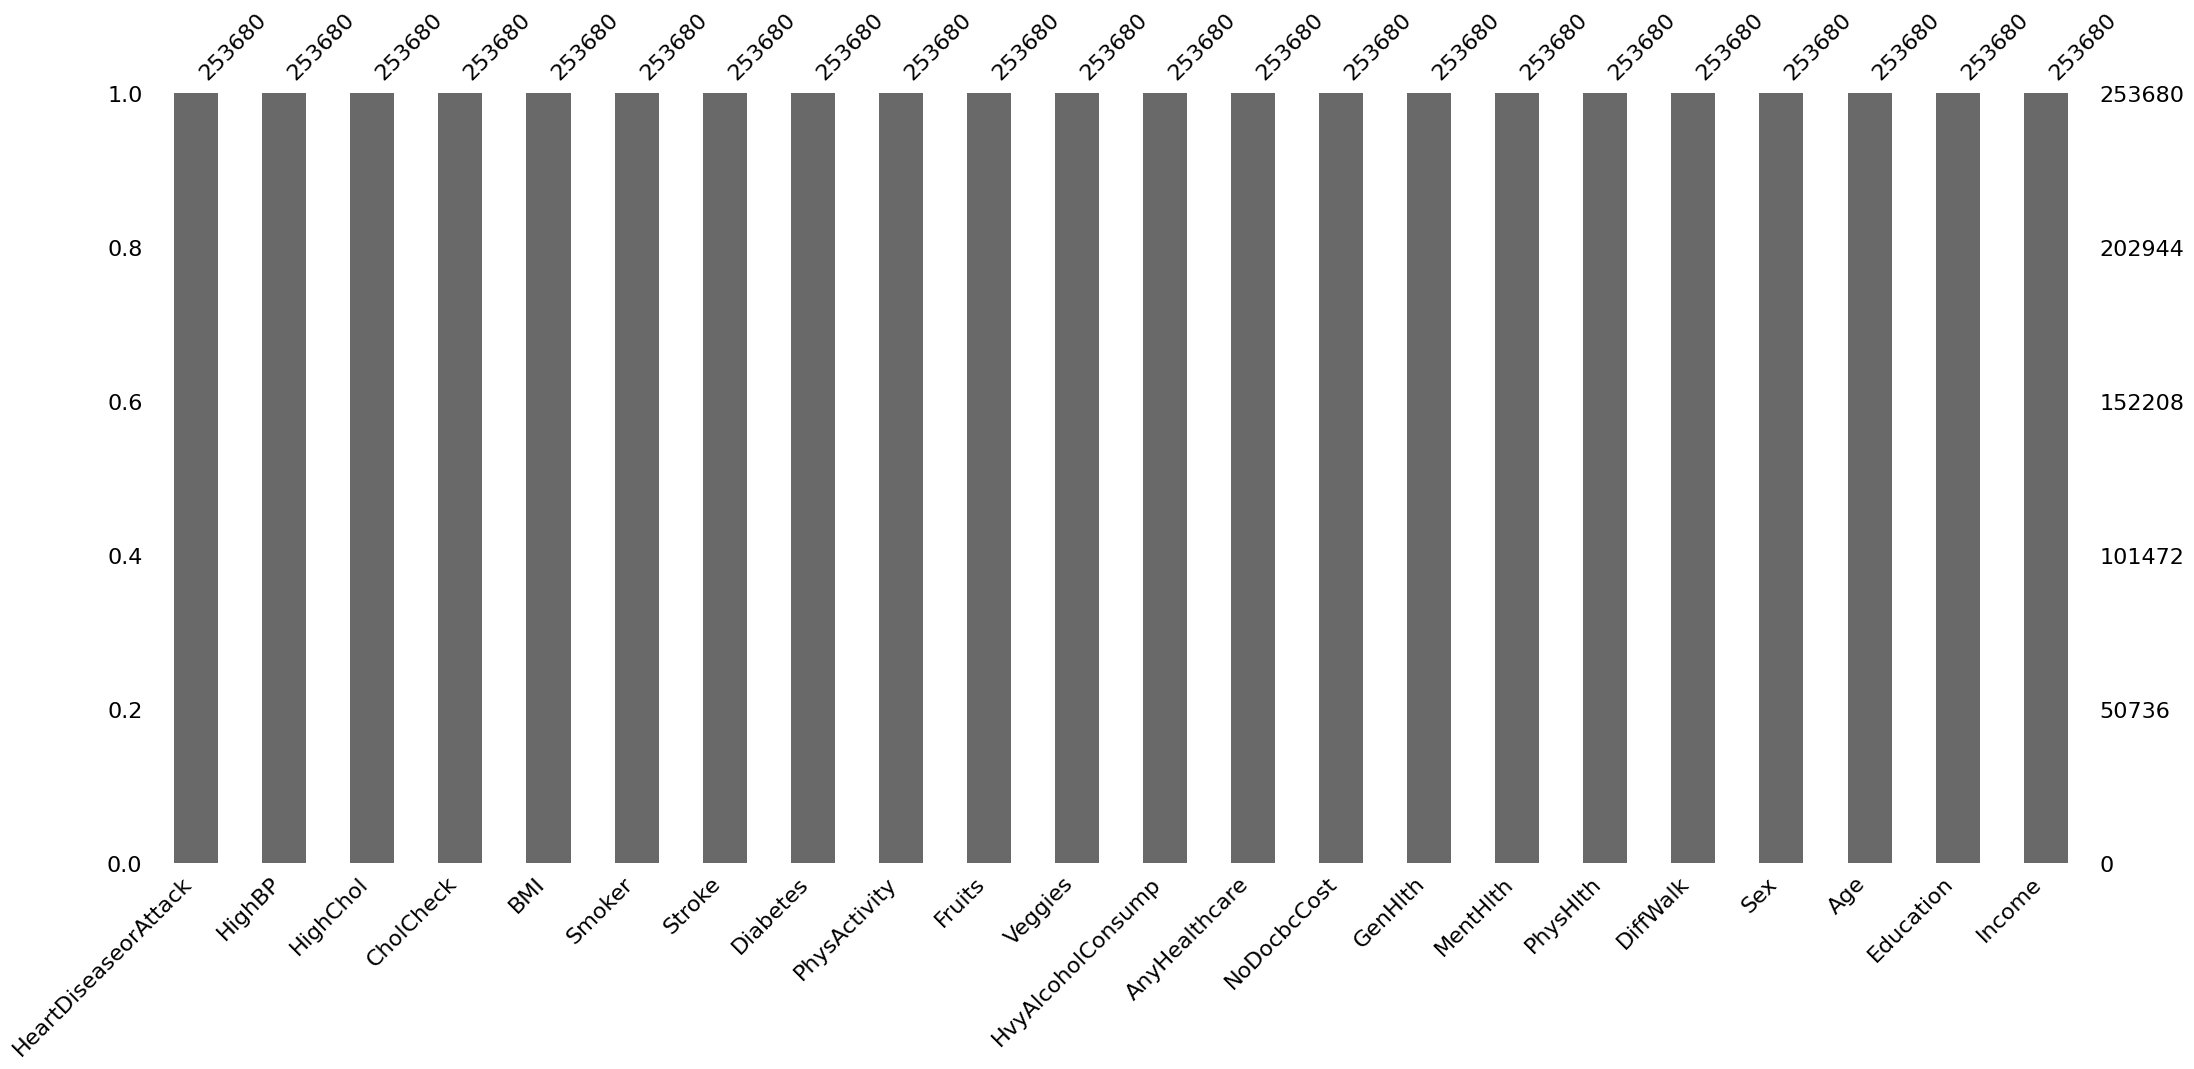

In [10]:
import missingno as msno

msno.bar(heart_df)
plt.show()

In [11]:
heart_df.head(10)

HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   
5                   0.0     1.0       1.0        1.0  25.0     1.0     0.0   
6                   0.0     1.0       0.0        1.0  30.0     1.0     0.0   
7                   0.0     1.0       1.0        1.0  25.0     1.0     0.0   
8                   1.0     1.0       1.0        1.0  30.0     1.0     0.0   
9                   0.0     0.0       0.0        1.0  24.0     0.0     0.0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0       0.0           0.0     0.0  ...            1.0          0.0      5.0   
1       0.0           1.0     0.0  ...            0.0          1.0      3.0   
2       0.0           0.0     1.0  ...            1.0          1.0      5.0   
3       0.0           1.0     1.0  ...            1.0          0.0      2.0   
4       0.0           1.0     1.0  ...            1.0          0.0      2.0   
5       0.0           1.0     1.0  ...            1.0          0.0      2.0   
6       0.0           0.0     0.0  ...            1.0          0.0      3.0   
7       0.0           1.0     0.0  ...            1.0          0.0      3.0   
8       2.0           0.0     1.0  ...            1.0          0.0      5.0   
9       0.0           0.0     0.0  ...            1.0          0.0      2.0   

   MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  Income  
0      18.0      15.0       1.0  0.0   9.0        4.0     3.0  
1       0.0       0.0       0.0  0.0   7.0        6.0     1.0  
2      30.0      30.0       1.0  0.0   9.0        4.0     8.0  
3       0.0       0.0       0.0  0.0  11.0        3.0     6.0  
4       3.0       0.0       0.0  0.0  11.0        5.0     4.0  
5       0.0       2.0       0.0  1.0  10.0        6.0     8.0  
6       0.0      14.0       0.0  0.0   9.0        6.0     7.0  
7       0.0       0.0       1.0  0.0  11.0        4.0     4.0  
8      30.0      30.0       1.0  0.0   9.0        5.0     1.0  
9       0.0       0.0       0.0  1.0   8.0        4.0     3.0  

[10 rows x 22 columns]

In [12]:
heart_df.describe()

HeartDiseaseorAttack         HighBP       HighChol      CholCheck  \
count         253680.000000  253680.000000  253680.000000  253680.000000   
mean               0.094186       0.429001       0.424121       0.962670   
std                0.292087       0.494934       0.494210       0.189571   
min                0.000000       0.000000       0.000000       0.000000   
25%                0.000000       0.000000       0.000000       1.000000   
50%                0.000000       0.000000       0.000000       1.000000   
75%                0.000000       1.000000       1.000000       1.000000   
max                1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke       Diabetes  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean       28.382364       0.443169       0.040571       0.296921   
std         6.608694       0.496761       0.197294       0.698160   
min        12.000000       0.000000       0.000000       0.000000   
25%        24.000000       0.000000       0.000000       0.000000   
50%        27.000000       0.000000       0.000000       0.000000   
75%        31.000000       1.000000       0.000000       0.000000   
max        98.000000       1.000000       1.000000       2.000000   

        PhysActivity         Fruits  ...  AnyHealthcare    NoDocbcCost  \
count  253680.000000  253680.000000  ...  253680.000000  253680.000000   
mean        0.756544       0.634256  ...       0.951053       0.084177   
std         0.429169       0.481639  ...       0.215759       0.277654   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         1.000000       0.000000  ...       1.000000       0.000000   
50%         1.000000       1.000000  ...       1.000000       0.000000   
75%         1.000000       1.000000  ...       1.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

             GenHlth       MentHlth       PhysHlth       DiffWalk  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        2.511392       3.184772       4.242081       0.168224   
std         1.068477       7.412847       8.717951       0.374066   
min         1.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         2.000000       0.000000       0.000000       0.000000   
75%         3.000000       2.000000       3.000000       0.000000   
max         5.000000      30.000000      30.000000       1.000000   

                 Sex            Age      Education         Income  
count  253680.000000  253680.000000  253680.000000  253680.000000  
mean        0.440342       8.032119       5.050434       6.053875  
std         0.496429       3.054220       0.985774       2.071148  
min         0.000000       1.000000       1.000000       1.000000  
25%         0.000000       6.000000       4.000000       5.000000  
50%         0.000000       8.000000       5.000000       7.000000  
75%         1.000000      10.000000       6.000000       8.000000  
max         1.000000      13.000000       6.000000       8.000000  

[8 rows x 22 columns]

C:\Users\ethan\AppData\Local\Temp\ipykernel_16788\1186142560.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_df[column])
c:\Users\ethan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ethan\AppData\Local\Temp\ipykernel_16788\1186142560.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level

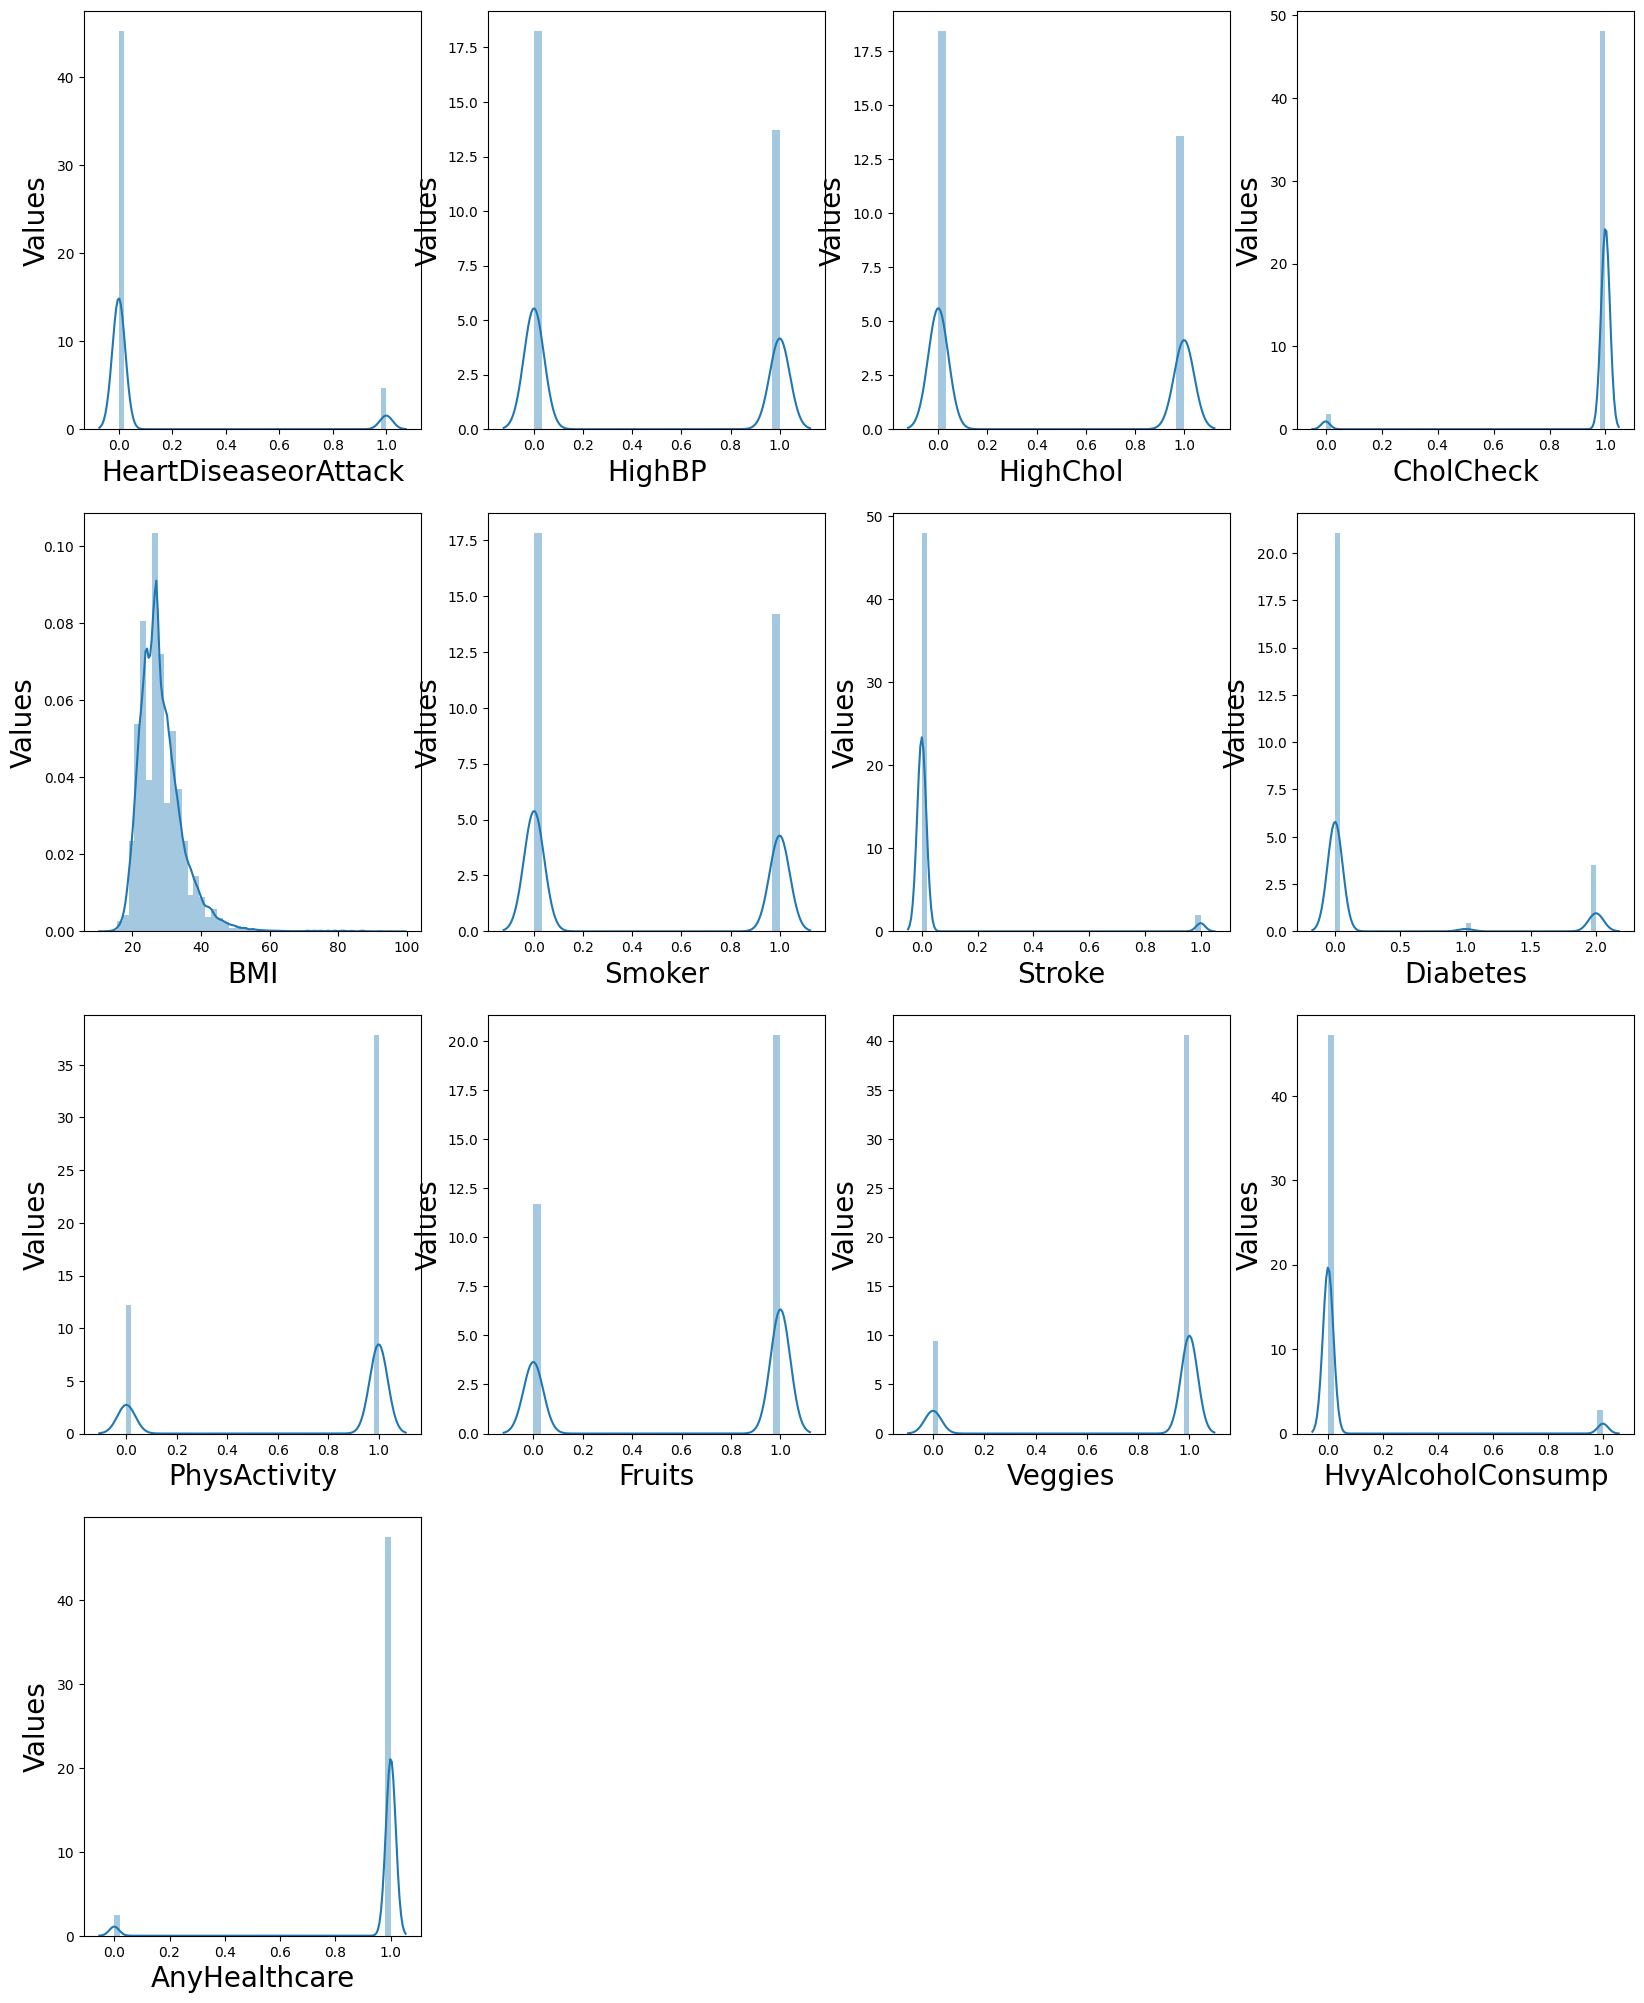

In [13]:
plt.figure(figsize=(20,25))
plotnumber=1

for column in heart_df:
    if plotnumber<14:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(heart_df[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Values',fontsize=20)
    plotnumber+=1
plt.show()

c:\Users\ethan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


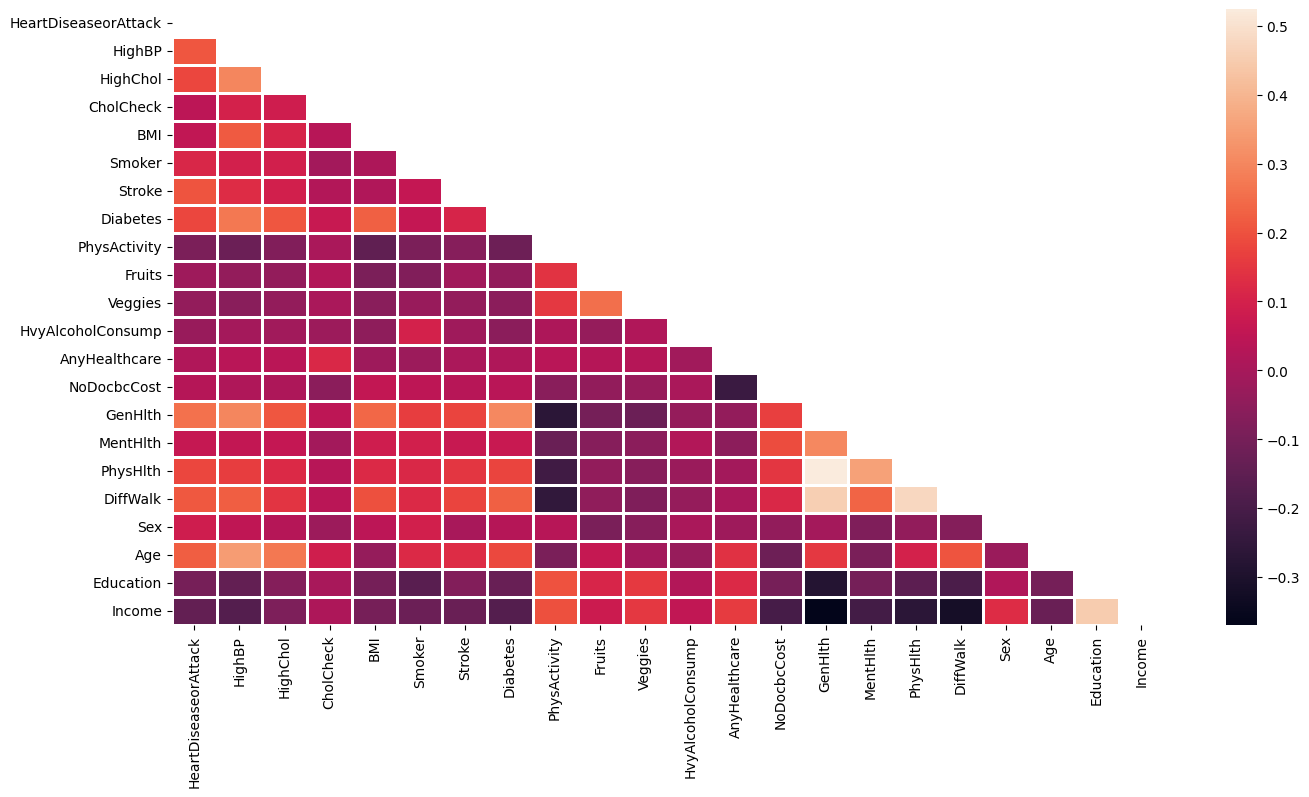

In [14]:
#Correlation matrix
plt.figure(figsize = (16, 8))

corr = heart_df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, annot = True, fmt = '.2g', linewidths = 1)
plt.show()

In [15]:
#checking the variance
heart_df.var()

HeartDiseaseorAttack     0.085315
HighBP                   0.244960
HighChol                 0.244243
CholCheck                0.035937
BMI                     43.674839
Smoker                   0.246771
Stroke                   0.038925
Diabetes                 0.487427
PhysActivity             0.184186
Fruits                   0.231976
Veggies                  0.153018
HvyAlcoholConsump        0.053039
AnyHealthcare            0.046552
NoDocbcCost              0.077091
GenHlth                  1.141644
MentHlth                54.950296
PhysHlth                76.002675
DiffWalk                 0.139925
Sex                      0.246442
Age                      9.328262
Education                0.971751
Income                   4.289652
dtype: float64

In [16]:
heart_df['MentHlth'] = np.log(heart_df['MentHlth'])
heart_df['PhysHlth'] = np.log(heart_df['PhysHlth'])
heart_df['GenHlth'] = np.log(heart_df['GenHlth'])

# Check for and handle infinite values
heart_df.replace([np.inf, -np.inf], np.nan, inplace=True)
heart_df.dropna(inplace=True)  # Drop rows with NaNs

# Calculate variance after handling infinite values
variance = np.var(heart_df[['MentHlth', 'PhysHlth', 'GenHlth']])
print(variance)

MentHlth    1.249166
PhysHlth    1.374625
GenHlth     0.159380
dtype: float64


c:\Users\ethan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\ethan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [17]:
x=heart_df.drop('HeartDiseaseorAttack',axis=1)    
y=heart_df['HeartDiseaseorAttack']

In [18]:
x.info
y.info

<bound method Series.info of 0         0.0
2         0.0
8         1.0
14        0.0
21        0.0
         ... 
253635    0.0
253648    0.0
253649    0.0
253665    0.0
253673    0.0
Name: HeartDiseaseorAttack, Length: 43933, dtype: float64>

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler


# Load your dataset
data = pd.read_csv('heart_disease_dataset.csv')

# Assuming 'heartdisease' is your target variable
X = data.drop('heartdisease', axis=1)
y = data['heartdisease']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the linear regression model
model = LinearRegression()

# Perform Recursive Feature Elimination (RFE) to select features
rfe = RFE(model, n_features_to_select=5)  # Adjust the number of features as needed
rfe.fit(X_train_scaled, y_train)

selected_features = X.columns[rfe.support_]

# Train the model with the selected features
model.fit(X_train_scaled[:, rfe.support_], y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled[:, rfe.support_])

# Evaluate the model
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test_scaled.shape[1] - 1)
mse = mean_squared_error(y_test, y_pred)
aic = len(y_test) * np.log(mse) + 2 * X_test_scaled.shape[1]
bic = len(y_test) * np.log(mse) + X_test_scaled.shape[1] * np.log(len(y_test))

print(f"Selected features: {selected_features}")
print(f"Adjusted R^2: {adj_r2}")
print(f"R^2: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"AIC: {aic}")
print(f"BIC: {bic}")



FileNotFoundError: [Errno 2] No such file or directory: 'heart_disease_dataset.csv'

In [ ]:
plt.figure(figsize=(20,4))
sn.distplot(heart_df['Age'],color='blue',label='Skewness : %.2f'%heart_df['Age'].skew())
plt.legend()

features = ['HighBP','HighChol','Smoker','BMI']
plt.figure(figsize=(20,10))

for i in range(1, 5):
    ax=plt.subplot(2, 2, i)
    ax=sn.distplot(heart_df[features[i-1]],label='Skewness : %.2f'%heart_df[features[i-1]].skew(),color='blue')
    ax=sn.distplot(heart_df[features[i-1]],label='Kurtosis : %.2f'%heart_df[features[i-1]].kurtosis())

    plt.legend(loc='best')

NameError: name 'sn' is not defined

<Figure size 2000x400 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,6))
stats.probplot(heart_df['Age'],dist="norm",plot=plt)
plt.title('Age')

features = ['HighBP','HighChol','Stroke','BMI']
plt.figure(figsize=(20,10))

for i in range(1, 5):
    ax=plt.subplot(2, 2, i)
    ax=stats.probplot(heart_df[features[i-1]],dist="norm",plot=plt)
    plt.title(features[i-1])

NameError: name 'stats' is not defined

<Figure size 2000x600 with 0 Axes>

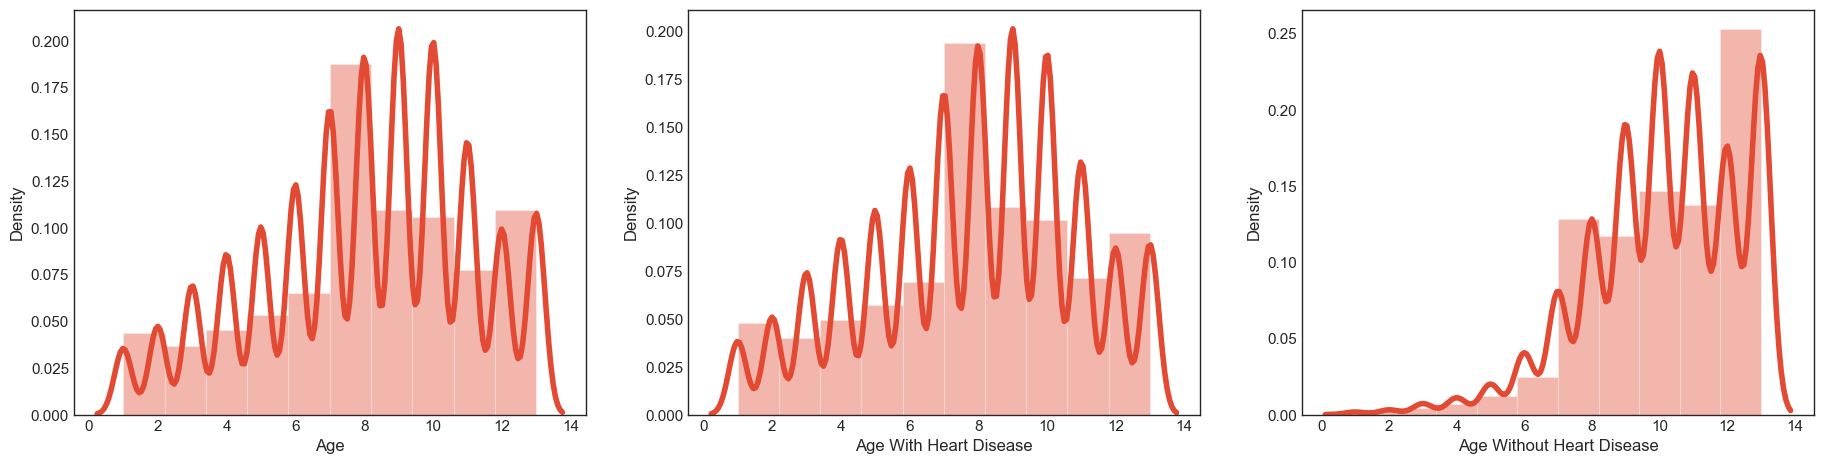

In [ ]:
sns.set_style("ticks")

# Assuming heart_df and heart_df['Age'] are already defined

age_heart_disease = heart_df.groupby('HeartDiseaseorAttack')['Age']

fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(20, 5))
ax = sns.distplot(heart_df['Age'], ax=axis1, bins=10)  # Adjust bins value as needed
ax.set(xlabel='Age')
ax = sns.distplot(age_heart_disease.get_group(0), ax=axis2, bins=10)  # Adjust bins value as needed
ax.set(xlabel='Age With Heart Disease')
ax = sns.distplot(age_heart_disease.get_group(1), ax=axis3, bins=10)  # Adjust bins value as needed
ax.set(xlabel='Age Without Heart Disease')

plt.show()


In [ ]:
groups_mean = heart_df.groupby('HeartDiseaseorAttack')['Age'].mean()
groups_std = heart_df.groupby('HeartDiseaseorAttack')['Age'].std()

groups = pa.DataFrame({'Group':[0,1],'Sample_Age_Mean':groups_mean.values,'Sample_Age_Std':groups_std.values,'Sample_Size':
                      [len(heart_df.Age[heart_df['HeartDiseaseorAttack'] == 0]),len(heart_df.Age[heart_df['HeartDiseaseorAttack'] == 1])]})
groups

Group  Sample_Age_Mean  Sample_Age_Std  Sample_Size
0      0         7.813858        3.046394       229787
1      1        10.131210        2.218853        23893

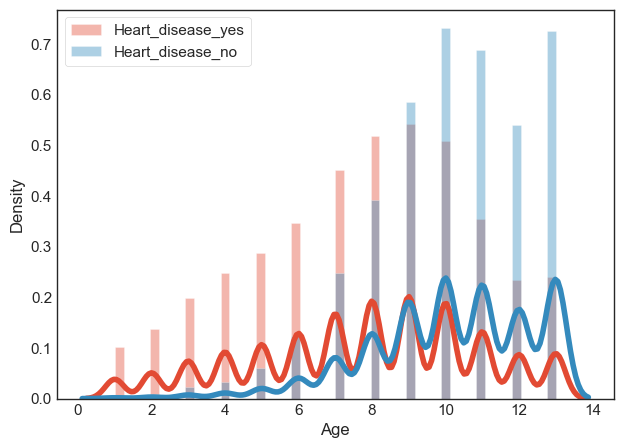

In [ ]:
sn.distplot(age_heart_disease.get_group(0),label='Heart_disease_yes')
sn.distplot(age_heart_disease.get_group(1),label='Heart_disease_no')
plt.legend()

In [22]:
x = []
for i in range(0,len(heart_df)):
    if((heart_df['Age'][i] > 17) & (heart_df['Age'][i] < 24)):
        x.append('18-24')
    elif((heart_df['Age'][i] > 24) & (heart_df['Age'][i] < 29)):
        x.append('25-29')        
    elif((heart_df['Age'][i] > 29) & (heart_df['Age'][i] < 34)):
        x.append('30-34')
    elif((heart_df['Age'][i] > 34) & (heart_df['Age'][i] < 39)):
        x.append('35-39')
    elif((heart_df['Age'][i] > 39) & (heart_df['Age'][i] < 44)):
        x.append('40-44')
    elif((heart_df['Age'][i] > 44) & (heart_df['Age'][i] < 49)):
        x.append('44-49')
    elif((heart_df['Age'][i] > 49) & (heart_df['Age'][i] < 54)):
        x.append('50-54')
    elif((heart_df['Age'][i] > 54) & (heart_df['Age'][i] < 59)):
        x.append('55-59')
    elif((heart_df['Age'][i] > 59) & (heart_df['Age'][i] < 64)):
        x.append('60-64')
    elif((heart_df['Age'][i] > 64) & (heart_df['Age'][i] < 69)):
        x.append('65-69')
    elif((heart_df['Age'][i] > 69) & (heart_df['Age'][i] < 74)):
        x.append('70-74')
    elif((heart_df['Age'][i] > 74) & (heart_df['Age'][i] < 79)):
        x.append('75-79')
    else:
        x.append('> 80')
heart_df['Group_Age'] = x
plt.figure(figsize=(25,6))
pa.crosstab(heart_df['Age'],heart_df['HeartDiseaseorAttack']).plot(kind="bar",figsize=(20,6))

NameError: name 'pa' is not defined

<Figure size 2500x600 with 0 Axes>

Text(0.5, 1.0, 'Sex Vs HD')

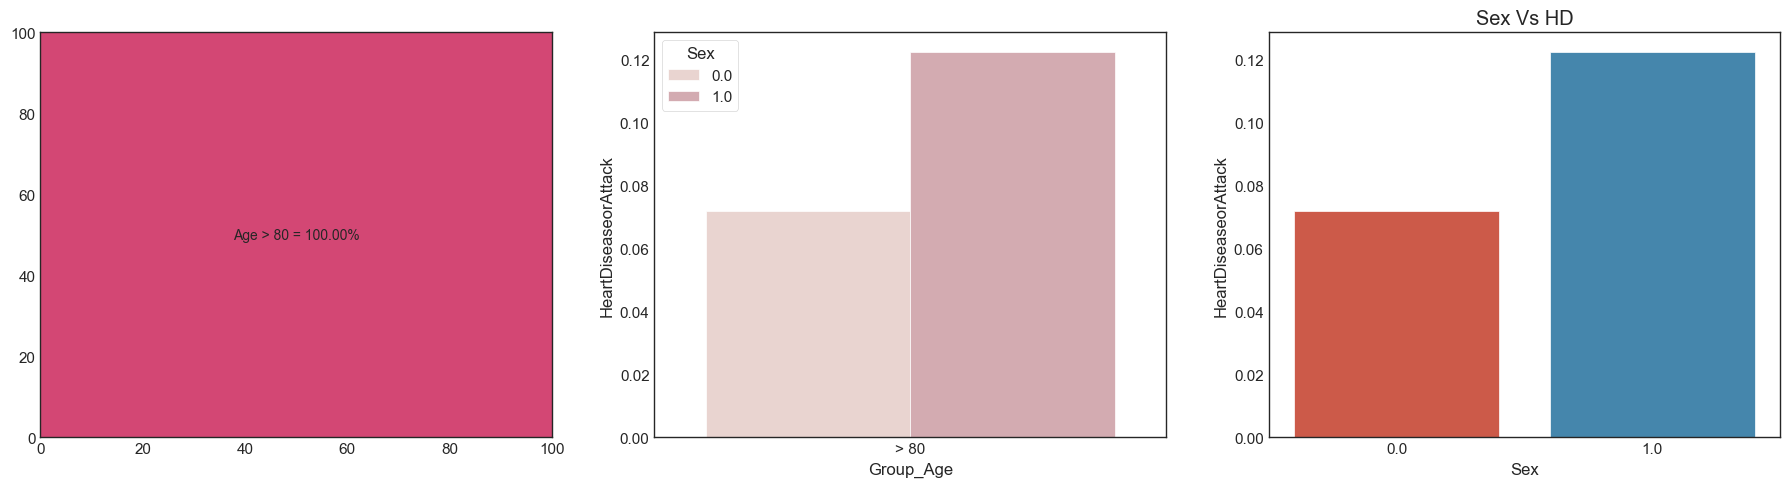

In [ ]:
import squarify
fig,(axis1,axis2,axis3) = plt.subplots(1,3,figsize=(20,5))
heart_df['Group_Age'].value_counts()
labels = heart_df['Group_Age'].value_counts().index
sizes = heart_df['Group_Age'].value_counts().values

perc = [str('{:5.2f}'.format(i/heart_df['Group_Age'].value_counts().sum()*100)) + "%" for i in heart_df['Group_Age'].value_counts()]
lbl = ["Age" + " " + el[0] + " = " + el[1] for el in zip(heart_df['Group_Age'].value_counts().index, perc)]
squarify.plot(sizes=sizes, label=lbl, alpha=.8,ax=axis1)


plt.title('Age Group Of Peoples')
sn.barplot(x='Group_Age',y='HeartDiseaseorAttack',hue='Sex',data=heart_df,palette=sn.cubehelix_palette(),ci=None,ax=axis2)
plt.title('Age Group Vs Sex Vs Target')
sn.barplot(x='Sex',y='HeartDiseaseorAttack',data=heart_df,ci=None,ax=axis3)
plt.title('Sex Vs HD')

<Axes: >

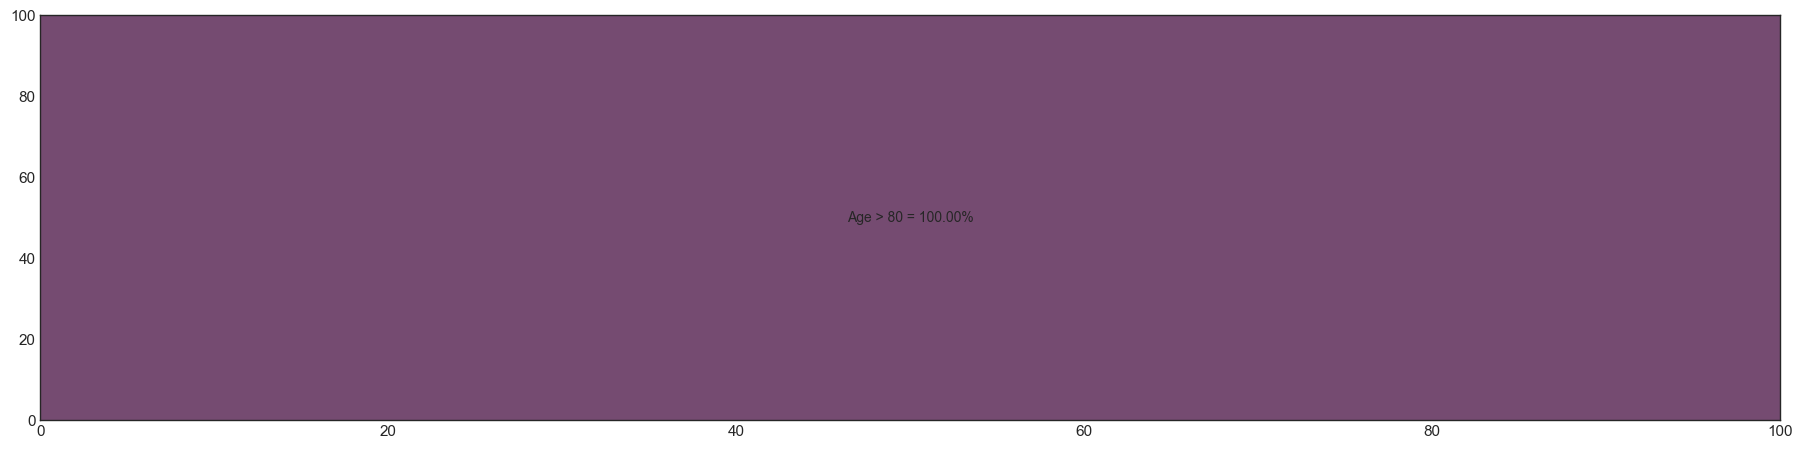

In [ ]:
fig,(axis1) = plt.subplots(1,figsize=(20,5))
heart_df['Group_Age'].value_counts()
labels = heart_df['Group_Age'].value_counts().index
sizes = heart_df['Group_Age'].value_counts().values

perc = [str('{:5.2f}'.format(i/heart_df['Group_Age'].value_counts().sum()*100)) + "%" for i in heart_df['Group_Age'].value_counts()]
lbl = ["Age" + " " + el[0] + " = " + el[1] for el in zip(heart_df['Group_Age'].value_counts().index, perc)]
squarify.plot(sizes=sizes, label=lbl, alpha=.8,ax=axis1)

In [ ]:
heart_df.count("Age")

NameError: name 'heart_df' is not defined

In [27]:
import pandas as pd

# Assuming 'heart_df' is your DataFrame with predictor variables and 'HeartDiseaseorAttack' is the target variable
# Assuming 'Age' is a column in your DataFrame representing age

# Filter the DataFrame for a specific age group and heart disease
age_group = (1, 1)  # Example age group (you can adjust as needed)
filtered_df = heart_df[(heart_df['Age'] >= age_group[0]) & (heart_df['Age'] <= age_group[1])]

# Count the number of observations in the age group with heart disease
num_heart_disease = filtered_df[filtered_df['HeartDiseaseorAttack'] == 1].shape[0]

# Count the total number of observations in the age group
total_observations = filtered_df.shape[0]

# Calculate the ratio of observations with heart disease over total observations in the age group
ratio_heart_disease = num_heart_disease / total_observations

# Print the results
print(f"Age Group: {age_group}")
print(f"Number of Observations with Heart Disease: {num_heart_disease}")
print(f"Total Number of Observations in Age Group: {total_observations}")
print(f"Ratio of Observations with Heart Disease: {ratio_heart_disease:.4f}")  # Display ratio with 2 decimal places


Age Group: (0, 1)
Number of Observations with Heart Disease: 29
Total Number of Observations in Age Group: 5700
Ratio of Observations with Heart Disease: 0.0051


In [29]:
import pandas as pd

# Assuming 'heart_df' is your DataFrame with predictor variables and 'HeartDiseaseorAttack' is the target variable
# Assuming 'Age' is a column in your DataFrame representing age

# Filter the DataFrame for a specific age group and heart disease
age_group = (2, 2)  # Example age group (you can adjust as needed)
filtered_df = heart_df[(heart_df['Age'] >= age_group[0]) & (heart_df['Age'] <= age_group[1])]

# Count the number of observations in the age group with heart disease
num_heart_disease = filtered_df[filtered_df['HeartDiseaseorAttack'] == 1].shape[0]

# Count the total number of observations in the age group
total_observations = filtered_df.shape[0]

# Calculate the ratio of observations with heart disease over total observations in the age group
ratio_heart_disease = num_heart_disease / total_observations

# Print the results
print(f"Age Group: {age_group}")
print(f"Number of Observations with Heart Disease: {num_heart_disease}")
print(f"Total Number of Observations in Age Group: {total_observations}")
print(f"Ratio of Observations with Heart Disease: {ratio_heart_disease:.4f}")  # Display ratio with 2 decimal places


Age Group: (2, 2)
Number of Observations with Heart Disease: 54
Total Number of Observations in Age Group: 7598
Ratio of Observations with Heart Disease: 0.0071


In [30]:
import pandas as pd

# Assuming 'heart_df' is your DataFrame with predictor variables and 'HeartDiseaseorAttack' is the target variable
# Assuming 'Age' is a column in your DataFrame representing age

# Filter the DataFrame for a specific age group and heart disease
age_group = (3, 3)  # Example age group (you can adjust as needed)
filtered_df = heart_df[(heart_df['Age'] >= age_group[0]) & (heart_df['Age'] <= age_group[1])]

# Count the number of observations in the age group with heart disease
num_heart_disease = filtered_df[filtered_df['HeartDiseaseorAttack'] == 1].shape[0]

# Count the total number of observations in the age group
total_observations = filtered_df.shape[0]

# Calculate the ratio of observations with heart disease over total observations in the age group
ratio_heart_disease = num_heart_disease / total_observations

# Print the results
print(f"Age Group: {age_group}")
print(f"Number of Observations with Heart Disease: {num_heart_disease}")
print(f"Total Number of Observations in Age Group: {total_observations}")
print(f"Ratio of Observations with Heart Disease: {ratio_heart_disease:.4f}")  # Display ratio with 2 decimal places


Age Group: (3, 3)
Number of Observations with Heart Disease: 126
Total Number of Observations in Age Group: 11123
Ratio of Observations with Heart Disease: 0.0113


In [31]:
import pandas as pd

# Assuming 'heart_df' is your DataFrame with predictor variables and 'HeartDiseaseorAttack' is the target variable
# Assuming 'Age' is a column in your DataFrame representing age

# Filter the DataFrame for a specific age group and heart disease
age_group = (4, 4)  # Example age group (you can adjust as needed)
filtered_df = heart_df[(heart_df['Age'] >= age_group[0]) & (heart_df['Age'] <= age_group[1])]

# Count the number of observations in the age group with heart disease
num_heart_disease = filtered_df[filtered_df['HeartDiseaseorAttack'] == 1].shape[0]

# Count the total number of observations in the age group
total_observations = filtered_df.shape[0]

# Calculate the ratio of observations with heart disease over total observations in the age group
ratio_heart_disease = num_heart_disease / total_observations

# Print the results
print(f"Age Group: {age_group}")
print(f"Number of Observations with Heart Disease: {num_heart_disease}")
print(f"Total Number of Observations in Age Group: {total_observations}")
print(f"Ratio of Observations with Heart Disease: {ratio_heart_disease:.4f}")  # Display ratio with 2 decimal places


Age Group: (4, 4)
Number of Observations with Heart Disease: 193
Total Number of Observations in Age Group: 13823
Ratio of Observations with Heart Disease: 0.0140


In [32]:
import pandas as pd

# Assuming 'heart_df' is your DataFrame with predictor variables and 'HeartDiseaseorAttack' is the target variable
# Assuming 'Age' is a column in your DataFrame representing age

# Filter the DataFrame for a specific age group and heart disease
age_group = (5, 5)  # Example age group (you can adjust as needed)
filtered_df = heart_df[(heart_df['Age'] >= age_group[0]) & (heart_df['Age'] <= age_group[1])]

# Count the number of observations in the age group with heart disease
num_heart_disease = filtered_df[filtered_df['HeartDiseaseorAttack'] == 1].shape[0]

# Count the total number of observations in the age group
total_observations = filtered_df.shape[0]

# Calculate the ratio of observations with heart disease over total observations in the age group
ratio_heart_disease = num_heart_disease / total_observations

# Print the results
print(f"Age Group: {age_group}")
print(f"Number of Observations with Heart Disease: {num_heart_disease}")
print(f"Total Number of Observations in Age Group: {total_observations}")
print(f"Ratio of Observations with Heart Disease: {ratio_heart_disease:.4f}")  # Display ratio with 2 decimal places


Age Group: (5, 5)
Number of Observations with Heart Disease: 351
Total Number of Observations in Age Group: 16157
Ratio of Observations with Heart Disease: 0.0217


In [33]:
import pandas as pd

# Assuming 'heart_df' is your DataFrame with predictor variables and 'HeartDiseaseorAttack' is the target variable
# Assuming 'Age' is a column in your DataFrame representing age

# Filter the DataFrame for a specific age group and heart disease
age_group = (6, 6)  # Example age group (you can adjust as needed)
filtered_df = heart_df[(heart_df['Age'] >= age_group[0]) & (heart_df['Age'] <= age_group[1])]

# Count the number of observations in the age group with heart disease
num_heart_disease = filtered_df[filtered_df['HeartDiseaseorAttack'] == 1].shape[0]

# Count the total number of observations in the age group
total_observations = filtered_df.shape[0]

# Calculate the ratio of observations with heart disease over total observations in the age group
ratio_heart_disease = num_heart_disease / total_observations

# Print the results
print(f"Age Group: {age_group}")
print(f"Number of Observations with Heart Disease: {num_heart_disease}")
print(f"Total Number of Observations in Age Group: {total_observations}")
print(f"Ratio of Observations with Heart Disease: {ratio_heart_disease:.4f}")  # Display ratio with 2 decimal places


Age Group: (6, 6)
Number of Observations with Heart Disease: 712
Total Number of Observations in Age Group: 19819
Ratio of Observations with Heart Disease: 0.0359


In [34]:
import pandas as pd

# Assuming 'heart_df' is your DataFrame with predictor variables and 'HeartDiseaseorAttack' is the target variable
# Assuming 'Age' is a column in your DataFrame representing age

# Filter the DataFrame for a specific age group and heart disease
age_group = (7, 7)  # Example age group (you can adjust as needed)
filtered_df = heart_df[(heart_df['Age'] >= age_group[0]) & (heart_df['Age'] <= age_group[1])]

# Count the number of observations in the age group with heart disease
num_heart_disease = filtered_df[filtered_df['HeartDiseaseorAttack'] == 1].shape[0]

# Count the total number of observations in the age group
total_observations = filtered_df.shape[0]

# Calculate the ratio of observations with heart disease over total observations in the age group
ratio_heart_disease = num_heart_disease / total_observations

# Print the results
print(f"Age Group: {age_group}")
print(f"Number of Observations with Heart Disease: {num_heart_disease}")
print(f"Total Number of Observations in Age Group: {total_observations}")
print(f"Ratio of Observations with Heart Disease: {ratio_heart_disease:.4f}")  # Display ratio with 2 decimal places


Age Group: (7, 7)
Number of Observations with Heart Disease: 1425
Total Number of Observations in Age Group: 26314
Ratio of Observations with Heart Disease: 0.0542


In [35]:
import pandas as pd

# Assuming 'heart_df' is your DataFrame with predictor variables and 'HeartDiseaseorAttack' is the target variable
# Assuming 'Age' is a column in your DataFrame representing age

# Filter the DataFrame for a specific age group and heart disease
age_group = (8, 8)  # Example age group (you can adjust as needed)
filtered_df = heart_df[(heart_df['Age'] >= age_group[0]) & (heart_df['Age'] <= age_group[1])]

# Count the number of observations in the age group with heart disease
num_heart_disease = filtered_df[filtered_df['HeartDiseaseorAttack'] == 1].shape[0]

# Count the total number of observations in the age group
total_observations = filtered_df.shape[0]

# Calculate the ratio of observations with heart disease over total observations in the age group
ratio_heart_disease = num_heart_disease / total_observations

# Print the results
print(f"Age Group: {age_group}")
print(f"Number of Observations with Heart Disease: {num_heart_disease}")
print(f"Total Number of Observations in Age Group: {total_observations}")
print(f"Ratio of Observations with Heart Disease: {ratio_heart_disease:.4f}")  # Display ratio with 2 decimal places


Age Group: (8, 8)
Number of Observations with Heart Disease: 2253
Total Number of Observations in Age Group: 30832
Ratio of Observations with Heart Disease: 0.0731


In [36]:
import pandas as pd

# Assuming 'heart_df' is your DataFrame with predictor variables and 'HeartDiseaseorAttack' is the target variable
# Assuming 'Age' is a column in your DataFrame representing age

# Filter the DataFrame for a specific age group and heart disease
age_group = (9, 9)  # Example age group (you can adjust as needed)
filtered_df = heart_df[(heart_df['Age'] >= age_group[0]) & (heart_df['Age'] <= age_group[1])]

# Count the number of observations in the age group with heart disease
num_heart_disease = filtered_df[filtered_df['HeartDiseaseorAttack'] == 1].shape[0]

# Count the total number of observations in the age group
total_observations = filtered_df.shape[0]

# Calculate the ratio of observations with heart disease over total observations in the age group
ratio_heart_disease = num_heart_disease / total_observations

# Print the results
print(f"Age Group: {age_group}")
print(f"Number of Observations with Heart Disease: {num_heart_disease}")
print(f"Total Number of Observations in Age Group: {total_observations}")
print(f"Ratio of Observations with Heart Disease: {ratio_heart_disease:.4f}")  # Display ratio with 2 decimal places


Age Group: (9, 9)
Number of Observations with Heart Disease: 3358
Total Number of Observations in Age Group: 33244
Ratio of Observations with Heart Disease: 0.1010


In [37]:
import pandas as pd

# Assuming 'heart_df' is your DataFrame with predictor variables and 'HeartDiseaseorAttack' is the target variable
# Assuming 'Age' is a column in your DataFrame representing age

# Filter the DataFrame for a specific age group and heart disease
age_group = (10, 10)  # Example age group (you can adjust as needed)
filtered_df = heart_df[(heart_df['Age'] >= age_group[0]) & (heart_df['Age'] <= age_group[1])]

# Count the number of observations in the age group with heart disease
num_heart_disease = filtered_df[filtered_df['HeartDiseaseorAttack'] == 1].shape[0]

# Count the total number of observations in the age group
total_observations = filtered_df.shape[0]

# Calculate the ratio of observations with heart disease over total observations in the age group
ratio_heart_disease = num_heart_disease / total_observations

# Print the results
print(f"Age Group: {age_group}")
print(f"Number of Observations with Heart Disease: {num_heart_disease}")
print(f"Total Number of Observations in Age Group: {total_observations}")
print(f"Ratio of Observations with Heart Disease: {ratio_heart_disease:.4f}")  # Display ratio with 2 decimal places


Age Group: (10, 10)
Number of Observations with Heart Disease: 4193
Total Number of Observations in Age Group: 32194
Ratio of Observations with Heart Disease: 0.1302


In [38]:
import pandas as pd

# Assuming 'heart_df' is your DataFrame with predictor variables and 'HeartDiseaseorAttack' is the target variable
# Assuming 'Age' is a column in your DataFrame representing age

# Filter the DataFrame for a specific age group and heart disease
age_group = (11, 11)  # Example age group (you can adjust as needed)
filtered_df = heart_df[(heart_df['Age'] >= age_group[0]) & (heart_df['Age'] <= age_group[1])]

# Count the number of observations in the age group with heart disease
num_heart_disease = filtered_df[filtered_df['HeartDiseaseorAttack'] == 1].shape[0]

# Count the total number of observations in the age group
total_observations = filtered_df.shape[0]

# Calculate the ratio of observations with heart disease over total observations in the age group
ratio_heart_disease = num_heart_disease / total_observations

# Print the results
print(f"Age Group: {age_group}")
print(f"Number of Observations with Heart Disease: {num_heart_disease}")
print(f"Total Number of Observations in Age Group: {total_observations}")
print(f"Ratio of Observations with Heart Disease: {ratio_heart_disease:.4f}")  # Display ratio with 2 decimal places


Age Group: (11, 11)
Number of Observations with Heart Disease: 3947
Total Number of Observations in Age Group: 23533
Ratio of Observations with Heart Disease: 0.1677


In [39]:
import pandas as pd

# Assuming 'heart_df' is your DataFrame with predictor variables and 'HeartDiseaseorAttack' is the target variable
# Assuming 'Age' is a column in your DataFrame representing age

# Filter the DataFrame for a specific age group and heart disease
age_group = (12, 12)  # Example age group (you can adjust as needed)
filtered_df = heart_df[(heart_df['Age'] >= age_group[0]) & (heart_df['Age'] <= age_group[1])]

# Count the number of observations in the age group with heart disease
num_heart_disease = filtered_df[filtered_df['HeartDiseaseorAttack'] == 1].shape[0]

# Count the total number of observations in the age group
total_observations = filtered_df.shape[0]

# Calculate the ratio of observations with heart disease over total observations in the age group
ratio_heart_disease = num_heart_disease / total_observations

# Print the results
print(f"Age Group: {age_group}")
print(f"Number of Observations with Heart Disease: {num_heart_disease}")
print(f"Total Number of Observations in Age Group: {total_observations}")
print(f"Ratio of Observations with Heart Disease: {ratio_heart_disease:.4f}")  # Display ratio with 2 decimal places

Age Group: (12, 12)
Number of Observations with Heart Disease: 3093
Total Number of Observations in Age Group: 15980
Ratio of Observations with Heart Disease: 0.1936


In [40]:
import pandas as pd

# Assuming 'heart_df' is your DataFrame with predictor variables and 'HeartDiseaseorAttack' is the target variable
# Assuming 'Age' is a column in your DataFrame representing age

# Filter the DataFrame for a specific age group and heart disease
age_group = (1, 1)  # Example age group (you can adjust as needed)
filtered_df = heart_df[(heart_df['Age'] >= age_group[0]) & (heart_df['Age'] <= age_group[1])]

# Count the number of observations in the age group with heart disease
num_heart_disease = filtered_df[filtered_df['HeartDiseaseorAttack'] == 1].shape[0] 

# Count the total number of observations in the age group
total_observations = filtered_df.shape[0] 

# Calculate the ratio of observations with heart disease over total observations in the age group
ratio_heart_disease = num_heart_disease / total_observations 

# Print the results 
print(f"Age Group: {age_group}") 
print(f"Number of Observations with Heart Disease: {num_heart_disease}") 
print(f"Total Number of Observations in Age Group: {total_observations}") 
print(f"Ratio of Observations with Heart Disease: {ratio_heart_disease:.4f}") # Display ratio with 2 decimal places

Age Group: (13, 13)
Number of Observations with Heart Disease: 4159
Total Number of Observations in Age Group: 17363
Ratio of Observations with Heart Disease: 0.2395
